# Notebook Instructions
<i>You can run the notebook document sequentially (one cell at a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i> <BR>
    
This course is based on specific versions of python packages. You can find the details of the same in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>. The manual also explains how to use these codes in other versions of python packages. <BR>

# Moving Average Crossover
Moving average crossover/crossunder is another popular method. The regime is bull when the short-term moving average is above the long-term and bearish when below. This method is computationally easy, conceptually simple and visually telling.
The two most common values are:

The two most common values are:
1. 50/200 crossover/crossunder known as golden and death cross, respectively. 
2. Close price above or below the 200-day moving average

## Import libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import data

### File names: 
1. Jan_2010_to_Jan_2019_Rebased_Series.csv


This data is available in the last unit of this course. You can find this file in the downloadables section of the course. We import these data by using the pandas function 'pandas.read_csv()'. This function will read the comma-separated values (CSV) file into dataframe.

In [2]:
# Data is stored in the directory 'data_modules' 
relative_path = "../data_modules/"

# Reads and imports the rebased series using the function 'read_csv'
data = pd.read_csv(
    relative_path + 'Jan_2010_to_Jan_2019_Rebased_Series.csv', index_col=0, parse_dates=True)

# Change index to datetime
data.index = pd.to_datetime(data.index)

# Returns the first two rows of the dataset
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close,rebased_open,rebased_high,rebased_low,rebased_close
Date,,,,,,,,,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.62,113.33,70.35,0.22,0.22,0.21,0.22,15.24,15.75,15.12,15.69
2010-01-05,15.74,16.21,15.70,16.20,0.63,113.63,71.06,0.22,0.23,0.22,0.23,15.58,16.05,15.54,16.04


## Simple moving average

A simple moving average is a technical indicator for determining if a stock price will continue or reverse a bull or bear trend. If the current close price is above the moving average, then it means that the stock is trending up, so we buy it. And similarly, if the close price is below the moving average, then it means that the stock is going down, so we sell it.

In [3]:
# Calculate the simple moving average for 50 days
data['sma_50'] = data['rebased_close'].rolling(50, 50).mean()
# Calculate the simple moving average for 200 days
data['sma_200'] = data['rebased_close'].rolling(200, 200).mean()

In [4]:
# Declare variables
short_term = 50
long_term = 200

# If sma_50>=sma_200, then bullish siganl = +1, else sma_50<sma_200, then bearish signal =-1
data['regime_sma_50_200'] = np.where(data['sma_50'] >= data['sma_200'], 1, -1)

In [5]:
# Create a function 'plot_graph' 
def plot_graph(data, ylabel, xlabel, title, legend):
    plt.figure(figsize=(10, 7))
    plt.plot(data)
    # Label title
    plt.title(title, fontsize=16)
    # Label x axis
    plt.xlabel(xlabel, fontsize=14)
    # Label y axis
    plt.ylabel(ylabel, fontsize=14)
    # Add legend
    plt.legend(labels=legend)
    # Add a grid
    plt.grid()
    # Display the graph
    plt.show()

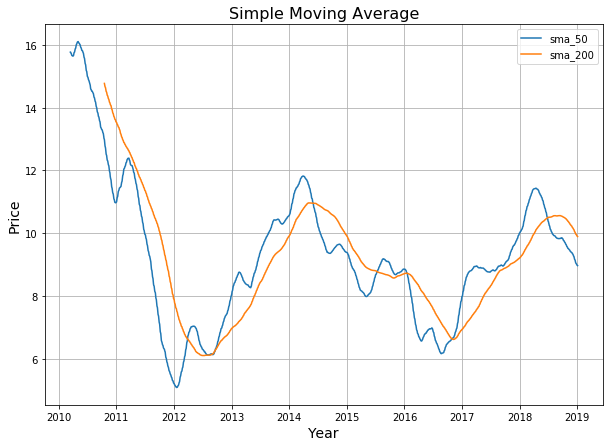

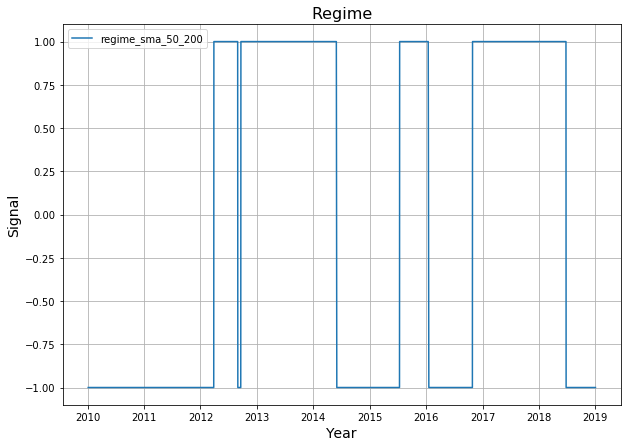

In [6]:
# Plot sma_50 against sma_200 to identify crossover
ax1 = plot_graph(data[['sma_50', 'sma_200']], "Price",
                 "Year", "Simple Moving Average", ['sma_50', 'sma_200'])

# Plot the signals
ax2 = plot_graph(data['regime_sma_50_200'], "Signal",
                 "Year", "Regime", ['regime_sma_50_200'])

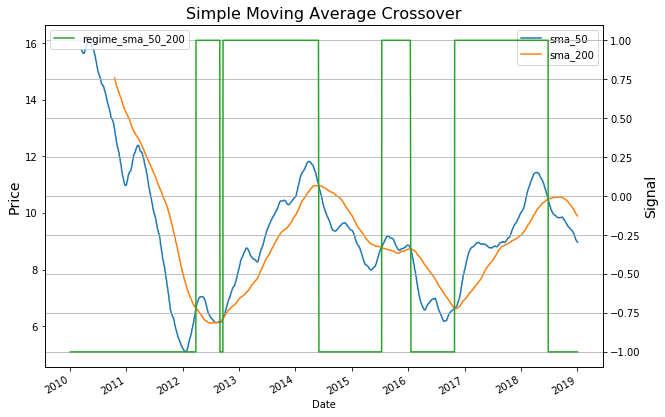

In [7]:
# Plot the graph
ax = data[['sma_50', 'sma_200']].plot(figsize=(10, 7))
ax1 = data['regime_sma_50_200'].plot(
    secondary_y=True, figsize=(10, 7), ax=ax)

# Label title, x-axis and y-axis
ax.set_title('Simple Moving Average Crossover', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax1.set_ylabel('Signal', fontsize=14)
# Places legend to the axis
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## Exponential moving average

The exponential moving average (EMA) is a weighted moving average (WMA) that gives more weighting, or importance, to recent price data than the simple moving average (SMA) does. If the current close price is above the exponential moving average, then it means that the stock is trending up, so we buy it. And similarly, if the close price is below the moving average then it means that the stock is going down, so we sell it.

In [8]:
# Calculate the exponential moving average for 50 days
data['ema_50'] = data['rebased_close'].ewm(span=50, min_periods=50).mean()
# Calculate the exponential moving average for 200 days
data['ema_200'] = data['rebased_close'].ewm(span=200, min_periods=200).mean()

In [9]:
# If ema_50>=ema_200, then bullish siganl = +1, else ema_50<ema_200, then bearish signal =-1
data['regime_ema'+'_'+str(50)+'_'+str(200)] = np.where(data['ema_50'] >=
                                                       data['ema_200'], 1, -1)

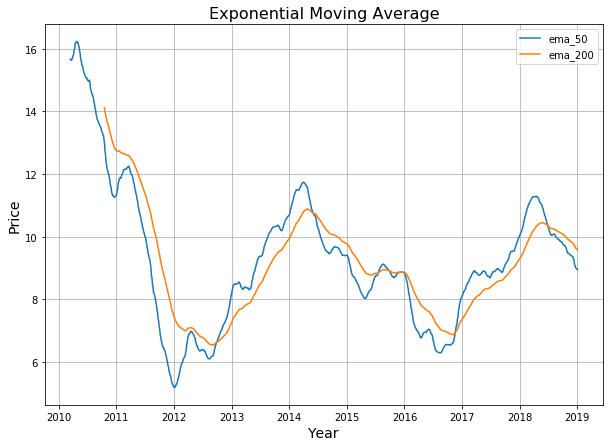

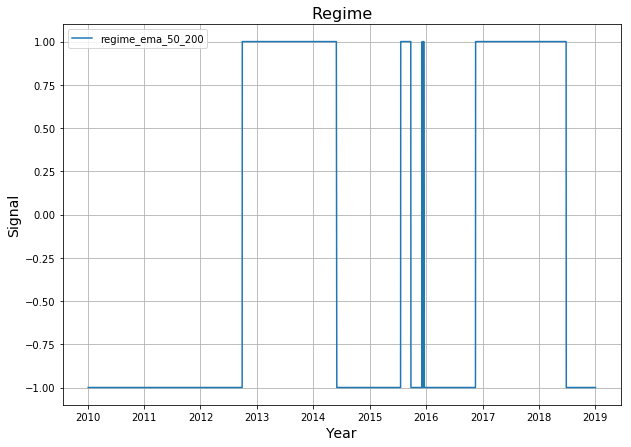

In [10]:
# Plot ema_50 against ema_200 to identify crossover
plot_graph(data[['ema_50', 'ema_200']], "Price", "Year",
           "Exponential Moving Average", ['ema_50', 'ema_200'])
# Plot the signals
plot_graph(data['regime_ema_50_200'], "Signal",
           "Year", "Regime", ['regime_ema_50_200'])

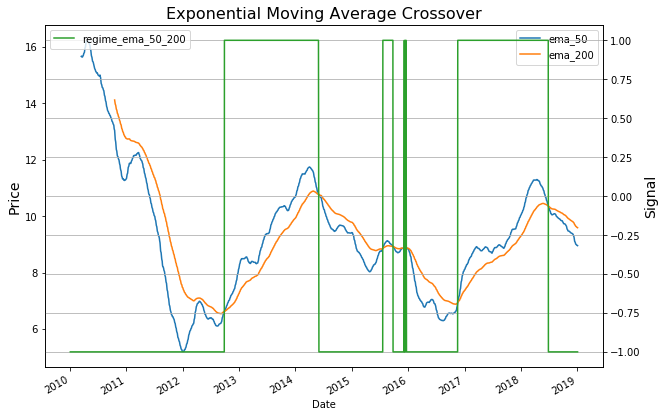

In [11]:
# Plot the graph
ax = data[['ema_50', 'ema_200']].plot(figsize=(10, 7))
ax1 = data['regime_ema_50_200'].plot(
    secondary_y=True, figsize=(10, 7), ax=ax)

# Label title, x-axis and
ax.set_title('Exponential Moving Average Crossover', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax1.set_ylabel('Signal', fontsize=14)
# Places legend to the axis
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## Create a function

We will be creating two functions:
1. Regime simple moving average function, 'regime_sma'
2. Regime exponential moving average function, 'regime_ema'

These two functions will be stored in the 'short_selling.py' library. This file will be available in the downloads section in the last unit of this course. 

In [12]:
def regime_sma(df,price,short_term,long_term):
    '''
    when price >= sma bull +1, when price < sma: bear -1, fillna 
    '''
    # Calculate short term simple moving average
    sma_st = df[price].rolling(window=short_term,min_periods = short_term).mean()
    # Calculate long term simple moving average
    sma_lt = df[price].rolling(window=long_term,min_periods = long_term).mean()
            
    # when price>= sma: bull, when price<sma: bear
    df['regime_sma'+'_'+str(short_term)+'_'+str(long_term)] = np.where(sma_st>= sma_lt,1,np.where(sma_st < sma_lt,-1,np.nan))
    
    return (df)

In [13]:

def regime_ema(df,price,short_term,long_term):
    '''
    when price >= ema bull +1, when price < ema: bear -1, fillna 
    '''
    # Calculate short term exponential moving average
    ema_st = df[price].ewm(span=short_term,min_periods = short_term).mean()
    # Calculate long term exponential moving average
    ema_lt = df[price].ewm(span=long_term,min_periods = long_term).mean()   
    
    # when price>= sma: bull, when price<sma: bear
    df['regime_ema'+'_'+str(short_term)+'_'+str(long_term)] = np.where(ema_st >= ema_lt,1,np.where(ema_st < ema_lt,-1,np.nan))
    
    return (df)


## Conclusion

Moving Average crossover is a splendid recipe for all kinds of stress-related ailments.

Pros:
It is simple, visual, intuitive
It is effective at protecting profits


Cons:
Cons: It does not work in sideways markets where the stock price tends to experience the Whipsaw movement.

In the next unit, you will learn how to code the two regimes discussed in this video.